In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [263]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease  = fetch_ucirepo(id=336) 

# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

1.

The problem is predict whether a patient has early stage of Indians Chronic Kidney Disease (CKD) and investigate the causes of it based on different features.

2. 

I will use feature encoding to deal with categorical variables which turns non-numeric into 0 and 1. (Codes are implemented after Question 5)

3.

In [264]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [265]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


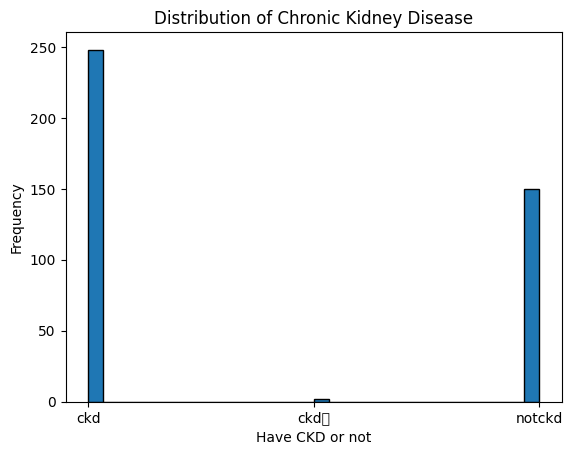

In [266]:
plt.hist(y['class'],bins = 30, edgecolor = "black")
plt.title('Distribution of Chronic Kidney Disease')
plt.xlabel('Have CKD or not')
plt.ylabel('Frequency')
plt.show()

1. This dataset is about 25 features which may predict a patient with chronic kidney disease (CKD). 

2. This dataset includes 400 observations with 250 instances corresponding to early-stage chronic kidney disease (CKD) patients and 150 instances corresponding to healthy controls.

3. There are 25 variables, including Integer, Categorical, Binary, Continuous variables.

4. From summary output, the average "age" is around 51, with highest age 90 and lowest age 2. The standard deviation 17.17 indicates that the dispersion of data is witnessed. 

5. From distribution plot, can find there are around 250 instances corresponding to early-stage chronic kidney disease patients and around 150 instances corresponding to healthy controls, which align with the discription of this dataset, but there is a group "ckt\t" which may be misleading to include in the analysis, so we need to remove it.

In [267]:
column_cat = [col for col in X.columns if X[col].dtype == 'object']
column_num = [col for col in X.columns if X[col].dtype != 'object']

for col in column_cat:
    print(f'{col} {X[col].unique()}')

print(f'class {y["class"].unique()}')

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
htn ['yes' 'no' nan]
dm ['yes' 'no' '\tno' nan]
cad ['no' 'yes' nan]
appet ['good' 'poor' nan]
pe ['no' 'yes' nan]
ane ['no' 'yes' nan]
class ['ckd' 'ckd\t' 'notckd']


From here we know there is some ambugity present in the "dm" and "class" column, need to remove them before next step.

In [268]:
X['dm'] = X['dm'].replace(to_replace = {'\tno':'no'})

y['class'] = y['class'].replace(to_replace = {'ckd\t': 'ckd'})

C:\Users\Henry\AppData\Local\Temp\ipykernel_21956\2491423322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dm'] = X['dm'].replace(to_replace = {'\tno':'no'})
C:\Users\Henry\AppData\Local\Temp\ipykernel_21956\2491423322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace(to_replace = {'ckd\t': 'ckd'})


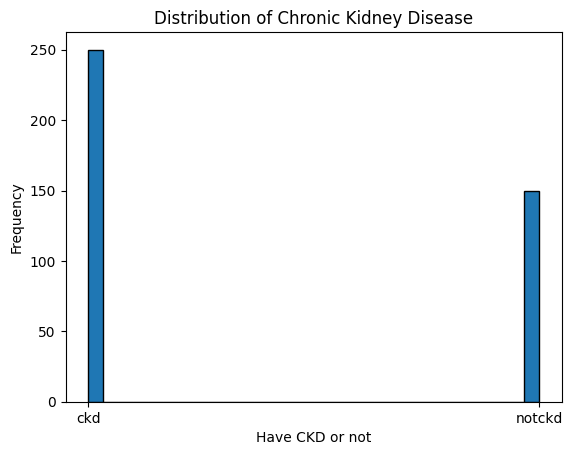

In [269]:
plt.hist(y['class'],bins = 30, edgecolor = "black")
plt.title('Distribution of Chronic Kidney Disease')
plt.xlabel('Have CKD or not')
plt.ylabel('Frequency')
plt.show()

After removing these ambugity and replace with right index, we can see the number of instances from the distribution plot align with the description of dataset.

4. 

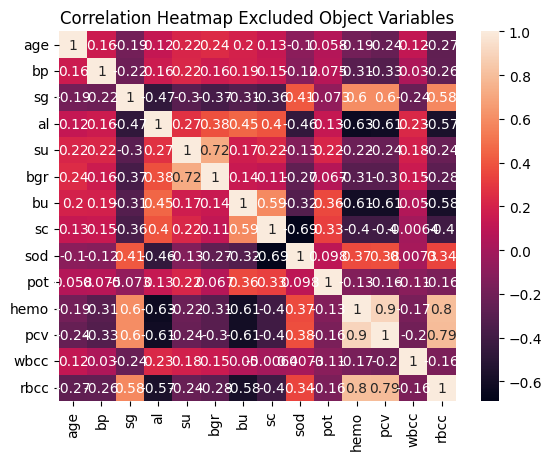

In [270]:
X_numeric = X.select_dtypes(exclude=['object'])
sns.heatmap(X_numeric.corr(), annot=True)
plt.title('Correlation Heatmap Excluded Object Variables')
plt.show()

1. From above heatmap plot, we can see the correlation between "hemo" and "pcv" is 0.9, indicates that they are highly positive correlated, with one increase, the other also tends to increase.

2. Correlation between "sc" and "sod" is -0.69, indicates that they are highly negative correlated, with one increase, the other tends to decrease.

3. We can get some initial understanding about the relationships between predictor variables, but we can not directly identify the relationships with target variables "class", we also need to include object variables into analysis. Therefore further analysis using machine learning algorithm is needed. 

5. 

In [271]:
print(X.isnull().sum())
print(y.isna().sum())

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64
class    0
dtype: int64


We found that there are a lot of missing values in the predictor variables, so we should not deleting the whole rows, instead we will replace the missing value in numeric variables with mean, and replace the one in categorical variables with most frequent value.

In [272]:
mean = X[column_num].mean()
X[column_num] = X[column_num].fillna(mean)

C:\Users\Henry\AppData\Local\Temp\ipykernel_21956\247344993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_num] = X[column_num].fillna(mean)


In [273]:
X[column_num].isnull().sum()


age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wbcc    0
rbcc    0
dtype: int64

In [274]:
mode_values = X.mode().iloc[0]
X[column_cat] = X[column_cat].fillna(mode_values) 

C:\Users\Henry\AppData\Local\Temp\ipykernel_21956\2518595467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_cat] = X[column_cat].fillna(mode_values)


In [275]:
X[column_cat].isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

Now after dealing with missing value, we will inplement feature encoding mentioned in Question 2 to deal with categorical variables which turns non-numeric into 0 and 1

In [276]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

for col in column_cat:
    X[col] = lb.fit_transform(X[col])
y['class']=lb.fit_transform(y['class'])

C:\Users\Henry\AppData\Local\Temp\ipykernel_21956\93707102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = lb.fit_transform(X[col])
C:\Users\Henry\AppData\Local\Temp\ipykernel_21956\93707102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = lb.fit_transform(X[col])
C:\Users\Henry\AppData\Local\Temp\ipykernel_21956\93707102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

6.

I don't think we need to address outliers because we have already replace missing values with means and most frequent value method, which have already distort the distribution of data, thus we need to decide which to drop and which will not be dropped. That is going to be really complicated since we need to deal with each variable separately, and find corresponding outliers.

7.

To implement sub-group analysis, we are going to use  K-means Clustering.

In [277]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [278]:
df = pd.concat([X, y], axis=1)

In [279]:
normailzed_X = pd.DataFrame(scale(X), columns = X.columns)

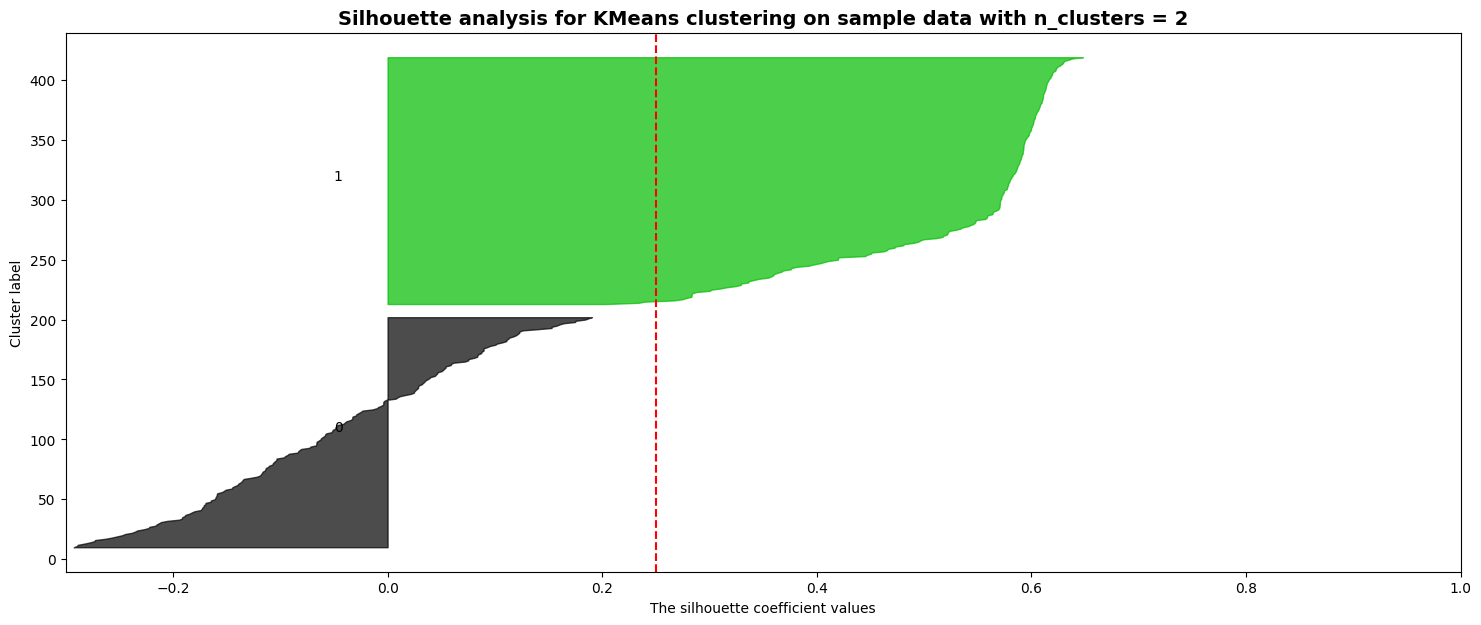

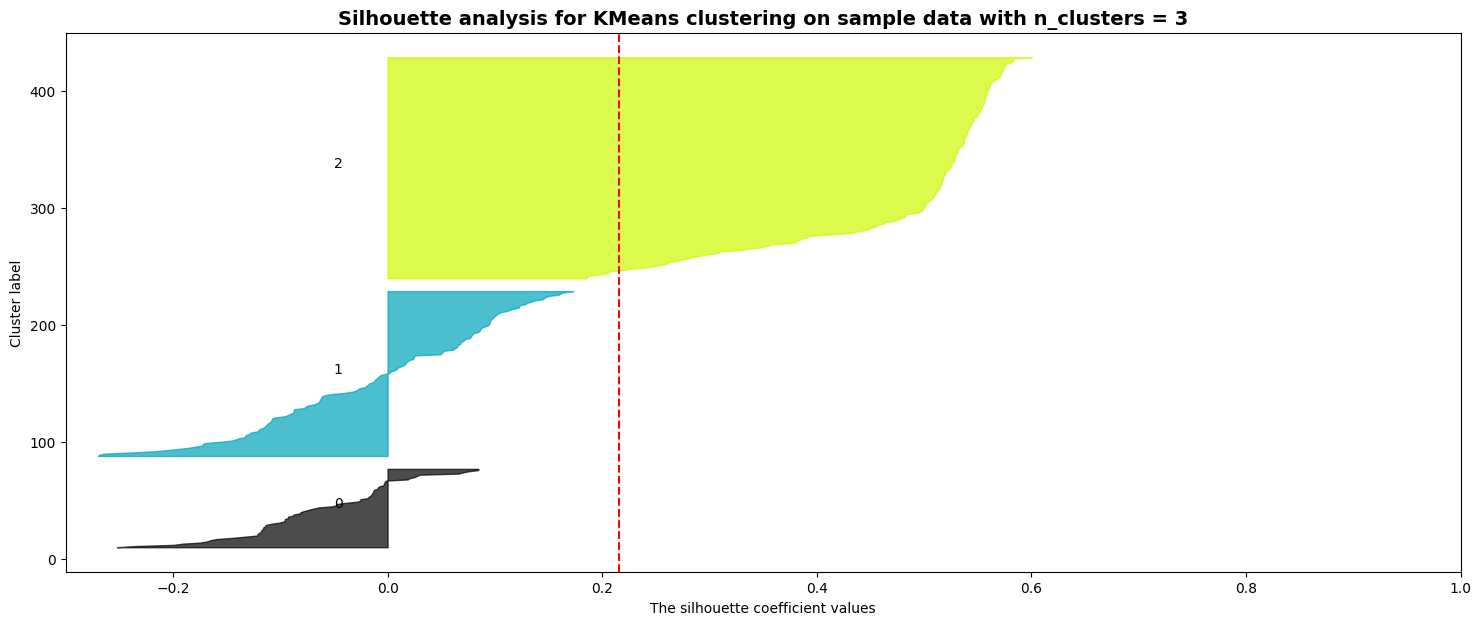

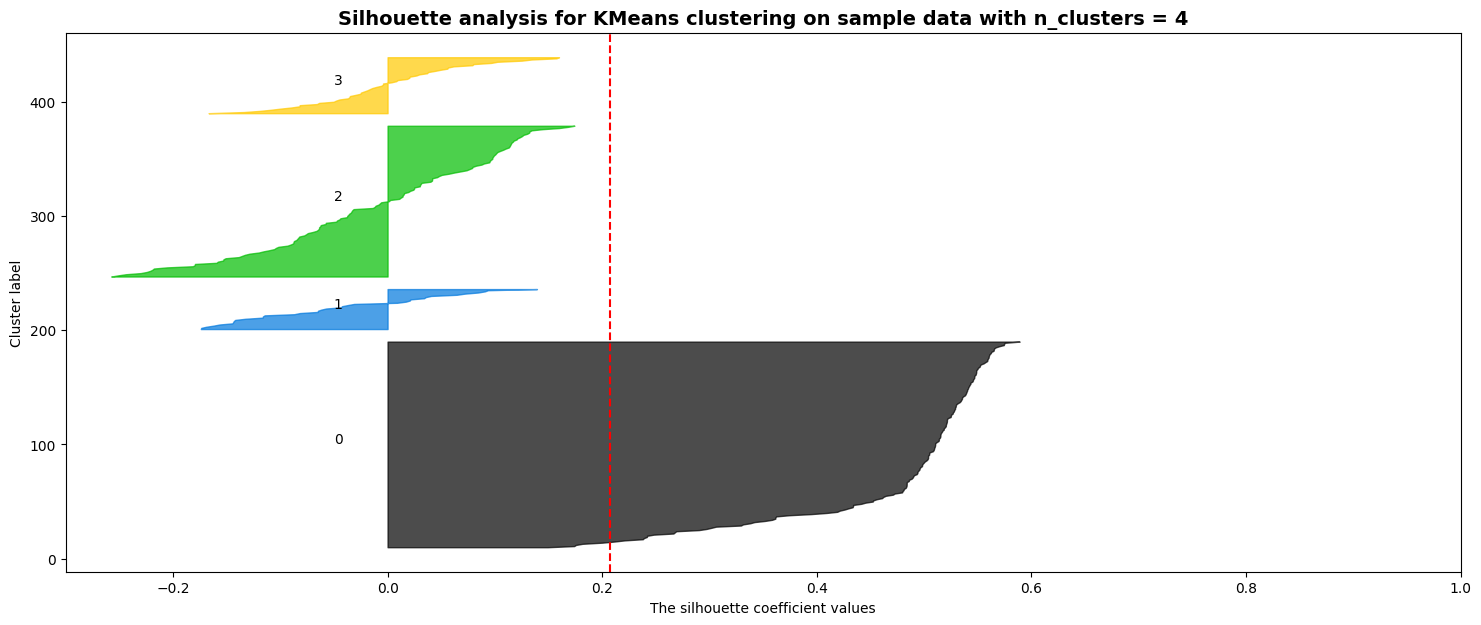

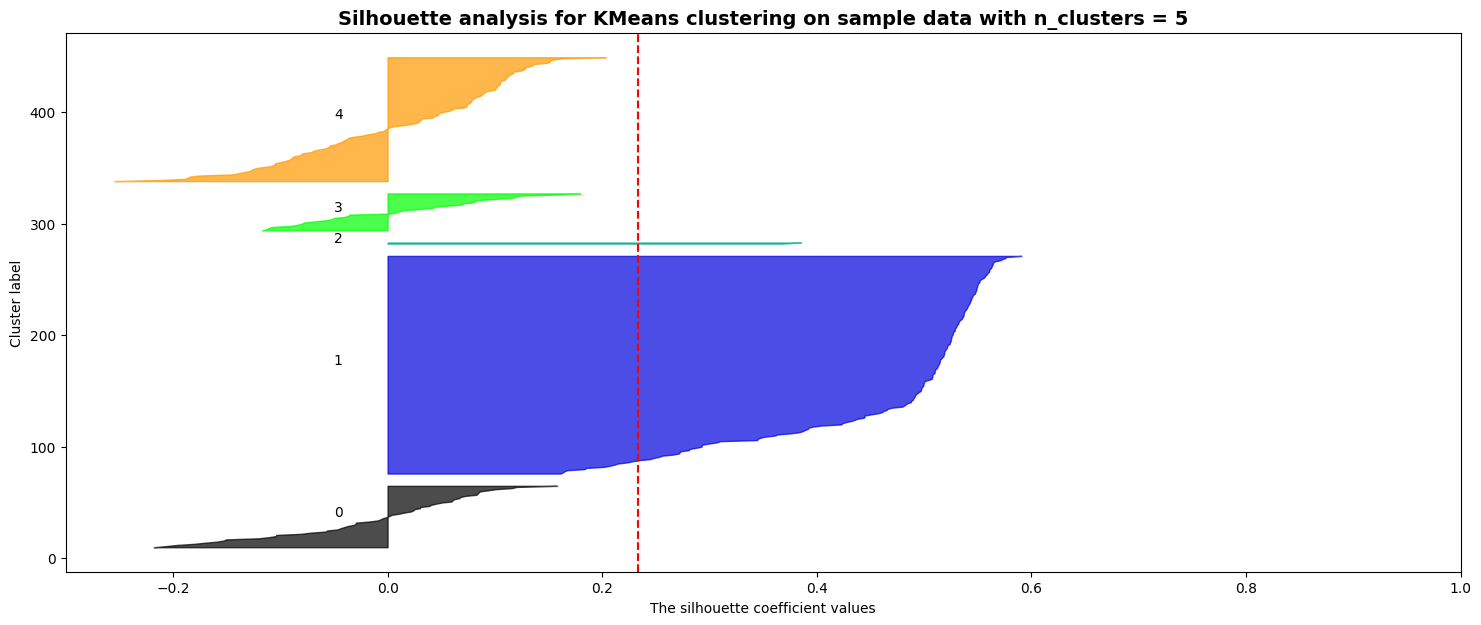

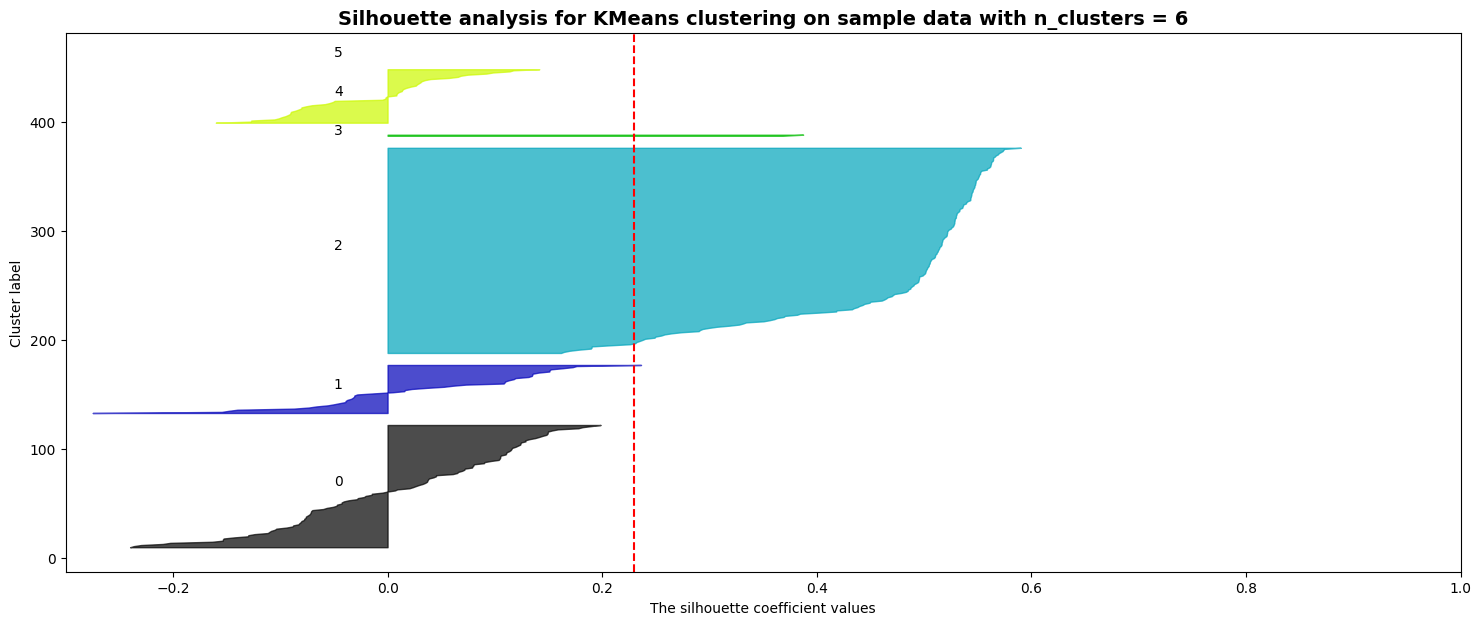

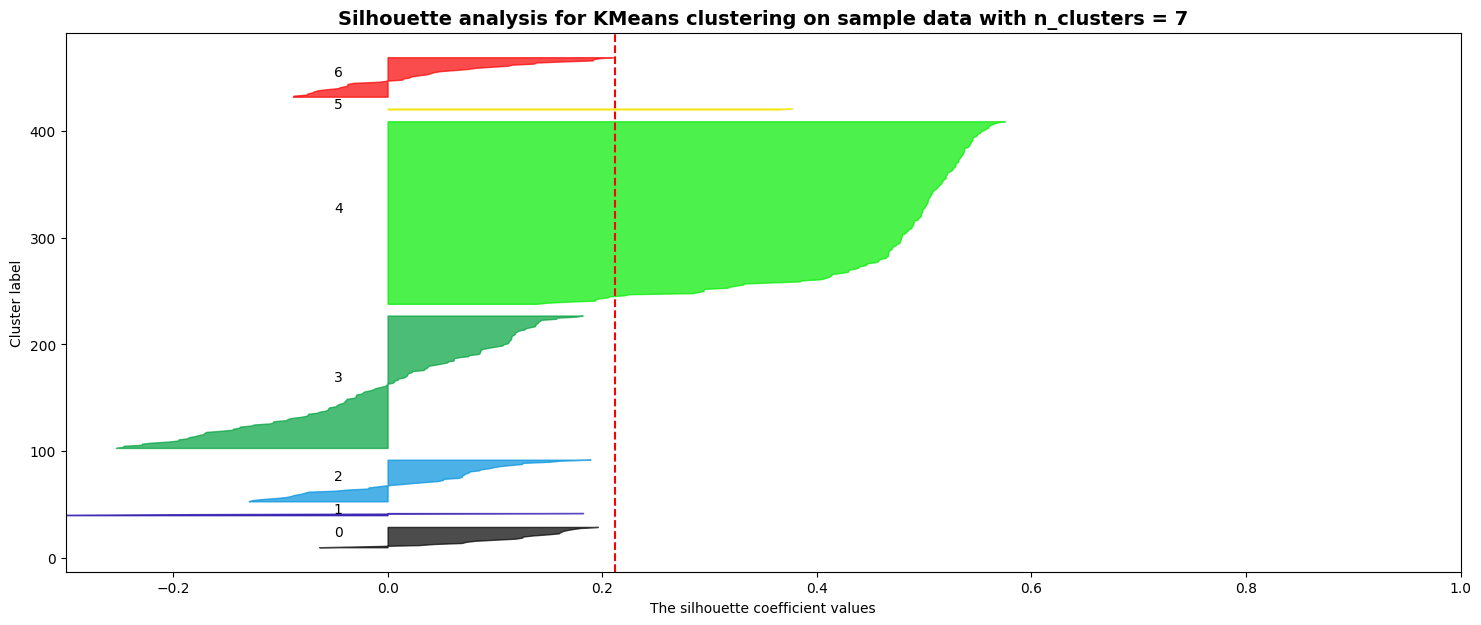

In [280]:
range_n_clusters = range(2,8)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(normailzed_X)
    # average silhouette score
    silhouette_avg_km = silhouette_score(normailzed_X, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(normailzed_X, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

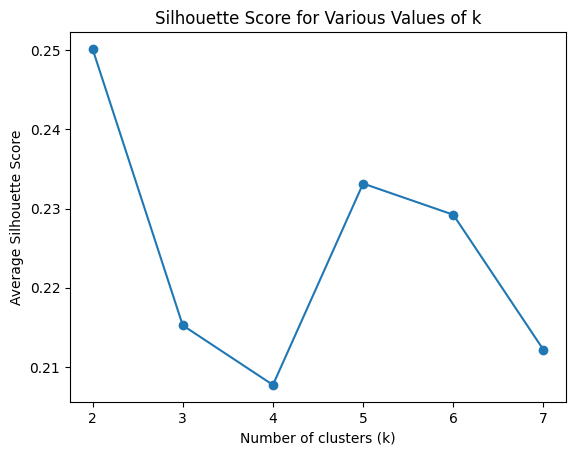

In [281]:
k_values = range(2,8)

silhouette_scores = []

for k in k_values:
    kms = KMeans(n_clusters=k, n_init=20, random_state=0)
    kms.fit(normailzed_X)
    cluster_labels_kms = kms.labels_
    silhouette = silhouette_score(normailzed_X, cluster_labels_kms)
    silhouette_scores.append(silhouette)
    
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Various Values of k')
plt.show()

We select multiple number of clusters to begin, from 2 to 7, and set the algorithm runs with 20 different centroid seeds. From the silhouette score plot and width plot we can see the optimal number of k is 2, wtih highest silhouette score, although indicating a poor performance with overlapping clusters.

In [282]:
km2 = KMeans(n_clusters=2, n_init=20, random_state=0)
km2.fit(normailzed_X)
km2.labels_

# find how many observations in each cluster
pd.Series(km2.labels_).value_counts()

1    207
0    193
Name: count, dtype: int64

Data is split into two clusters, there are 207 observations in cluster 0 and 193 observations in cluster 1

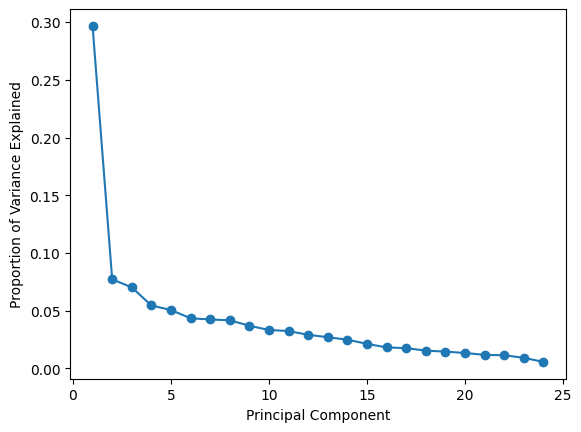

In [283]:
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

pca = PCA()
pca.fit(normailzed_X)

pca.explained_variance_ratio_

plt.plot(range(1, len(pca.explained_variance_ratio_
)+1), pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.show()

By using 'elbow' rule, the chosen number of principal component is 2.

In [284]:
loading_df = pd.DataFrame({'Variable': normailzed_X.columns, 'Loading': pca.components_[1]})
print(loading_df)

   Variable   Loading
0       age -0.249604
1        bp -0.041078
2        sg  0.091124
3        al -0.016162
4        su -0.467289
5       rbc -0.079271
6        pc -0.030784
7       pcc -0.091954
8        ba -0.026491
9       bgr -0.453696
10       bu  0.278784
11       sc  0.298895
12      sod -0.200938
13      pot  0.088914
14     hemo -0.143756
15      pcv -0.129874
16     wbcc -0.183609
17     rbcc -0.110295
18      htn -0.106371
19       dm -0.293777
20      cad -0.125030
21    appet  0.039700
22       pe  0.080248
23      ane  0.258532


In [285]:
sum(pca.explained_variance_ratio_[:2])

0.3738721567906876

In [286]:
pc_scores = pd.DataFrame(pca.fit_transform(normailzed_X), columns=[f'PC{i}' for i in range(1, 25)], index=normailzed_X.index)


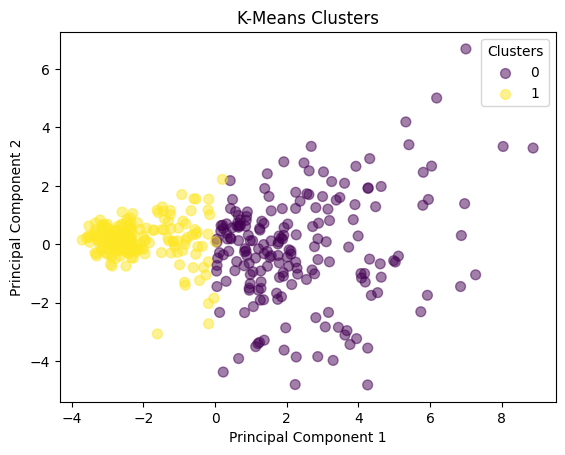

In [287]:
scatter = plt.scatter(pc_scores['PC1'], pc_scores['PC2'], c=km2.labels_, cmap='viridis', alpha=0.5, s=50)

plt.title('K-Means Clusters')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')

unique_labels = np.unique(km2.labels_)
for label in unique_labels:
    plt.scatter([],[], color=scatter.cmap(scatter.norm(label)), label=label, alpha=0.5, s=50)
    
plt.legend(title="Clusters")

plt.show()

In [288]:
from sklearn.metrics.cluster import adjusted_rand_score

true_labels = y.values.ravel()

adjusted_rand_score(true_labels, km2.labels_)

0.510037670233958

The adjusted Rand index is around 0.510, suggests that there is some level of agreement between the true labels and the clustering labels, suggesting that the clustering algorithm has captured some underlying structure in the data. However, this is not the very efficient in dealing with this dataset, will try other methods.

8.

In [289]:
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,f1_score

In [290]:
scale_x=scale(X,axis=0)


In [291]:
X_train, X_test, y_train, y_test = train_test_split(
    scale_x,
    y, 
    test_size=0.3, 
    random_state=1, 
    stratify=y
    )

9.

We will use KNN and Random Forest classifier for further analysis

10.

1. F1 Score
2. AUC-ROC

Since this dataset is imbalanced, accuracy may not be an appropriate metric because a model could achieve high accuracy by simply predicting the majority class all the time. In such cases, F1 score and AUC-ROC can be better metrics to consider. 

11.

### Random Forest

In [378]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score


Enhance the performance by Feature Selection for Random Forest classifer.

In [379]:
rf = RandomForestClassifier()
min_features = 1
max_features = 24

In [382]:
efs = SFS(rf,
          k_features=(min_features, max_features),
          forward=True,
          floating=False,
          scoring='roc_auc',  
          cv=10)  

efs.fit(X_train, y_train)

c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1

SequentialFeatureSelector(cv=10, estimator=RandomForestClassifier(),
                          k_features=(1, 24), scoring='roc_auc')

In [383]:
efs.k_feature_names_

('2', '3', '5', '8', '11', '15')

In [384]:
selected_feature_indices = np.array(efs.k_feature_idx_)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

Index(['sg', 'al', 'rbc', 'ba', 'sc', 'pcv'], dtype='object')


In [385]:
X_train_selected = efs.transform(X_train)
X_test_selected = efs.transform(X_test)


In [386]:
rf.fit(X_train_selected, y_train)

c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [387]:
y_pred_selected = rf.predict(X_test_selected)

In [388]:
f1_score(y_test, y_pred_selected)

1.0

In [389]:
confusion_matrix(y_test, y_pred_selected)

array([[75,  0],
       [ 0, 45]], dtype=int64)

In [390]:
auc_roc = roc_auc_score(y_test, y_pred_selected)
print(auc_roc)

1.0


12.

### KNN

In [300]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [301]:
f1_score(y_test, y_pred)


0.9777777777777777

In [302]:
confusion_matrix(y_test,y_pred)

array([[74,  1],
       [ 1, 44]], dtype=int64)

In [303]:
y_prob1 = knn.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob1)
print(auc_roc)

0.9928888888888888


From above implementation of Random Forest and KNN, we can see that Random Forests has F1 score 1.00 and AUC_ROC score 1.00; and KNN achieves an F1 score 0.978 and AUC-ROC score 0.993.

A high F1 score close to 1 indicates that classifier accurately identifies individuals with CKD while minimizing misclassifications. A high AUC-ROC score close to 1 indicates that classifier can effectively separate CKD patients from healthy controls. These scores implies both classifiers performs exceptionally well, with Random Forests' performance slightly overtake KNN's.

13.

In [393]:
rf = RandomForestClassifier()


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConvers

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [394]:
grid_search.best_params_
best_rf = grid_search.best_estimator_

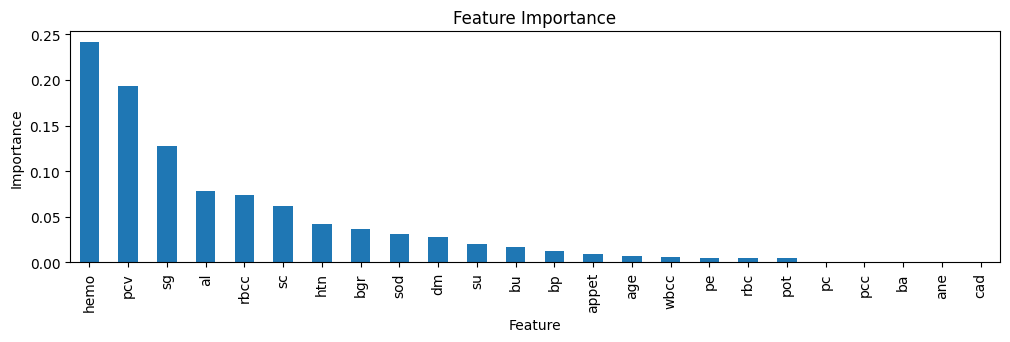

In [397]:
X_df = pd.DataFrame(X)

columns = X_df.columns

feature_series = pd.Series(data=best_rf.feature_importances_, index=columns)

feature_series_sorted = feature_series.sort_values(ascending=False)

plt.figure(figsize=(12, 3))
feature_series_sorted.plot.bar()
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)  
plt.show()

1. From above bar chart, we can see "hemo" is the most significant predictor variable followed by "pcv" and "sg" as the top three causes of possible CKD.

2. We can also conclude that "pc", "pcc", "ba","ane" and "cad" have little or no influence on the causes of CKD.

14.

15.

Guanchen Hu's individual work

16.